In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/winequality-red.csv')

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [172]:
df.shape

(1599, 12)

In [173]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [174]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

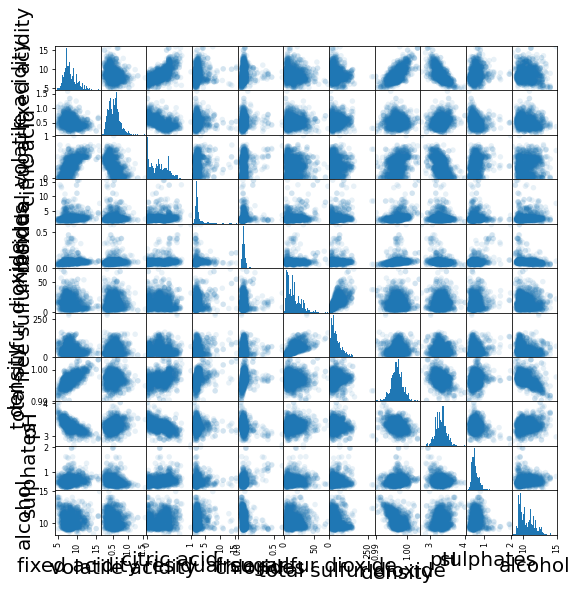

In [175]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.savefig('../figures/scattermatrix1.jpg', dpi = 300)
plt.show()

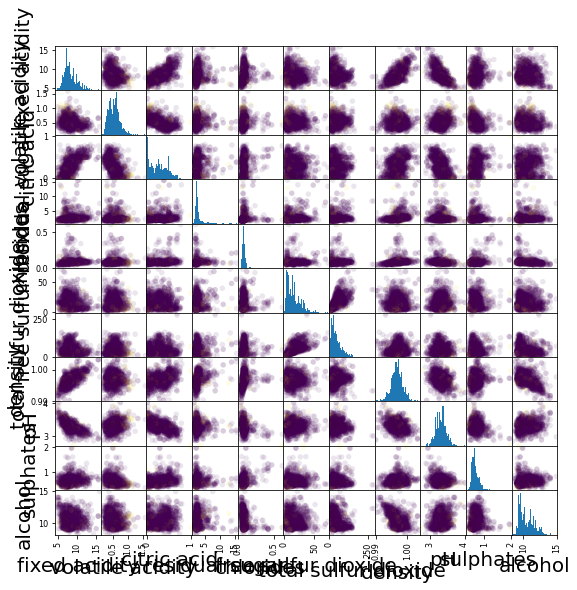

In [176]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(9, 9),c = pd.get_dummies(df['quality']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.savefig('../figures/scattermatrix2.jpg', dpi = 300)
plt.show()

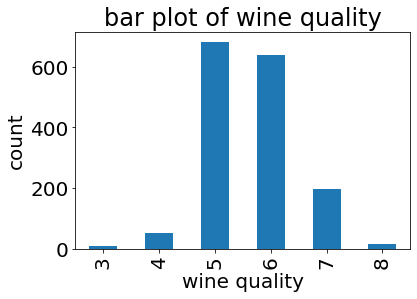

In [177]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

pd.value_counts(df['quality']).sort_index().plot.bar()
plt.ylabel('count')
plt.xlabel('wine quality')
plt.title('bar plot of wine quality')
plt.savefig('../figures/qualitybar.jpg', dpi = 300, bbox_inches='tight')
plt.show()

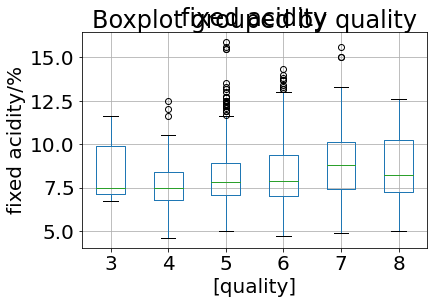

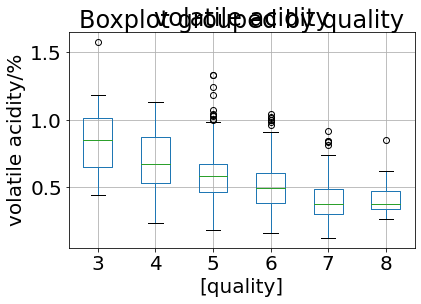

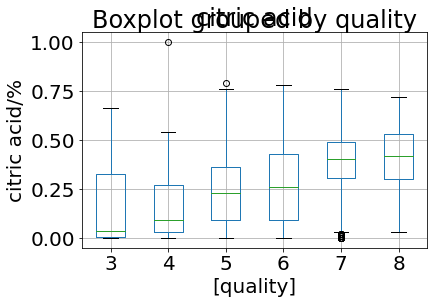

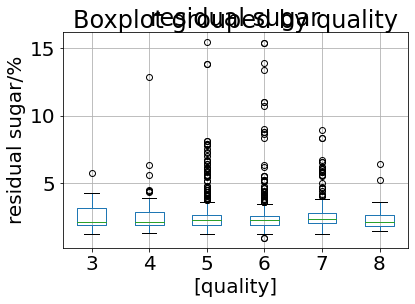

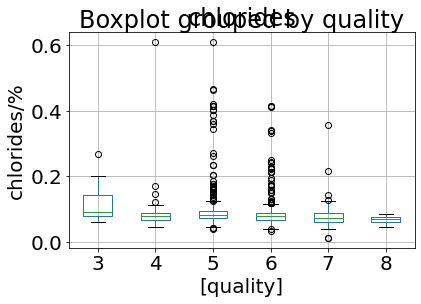

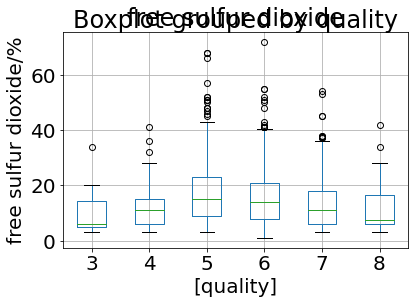

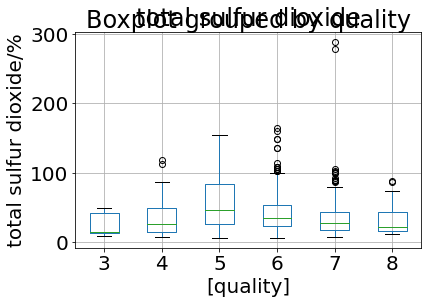

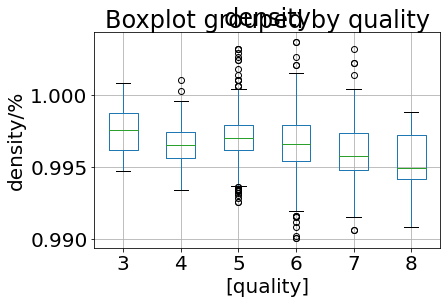

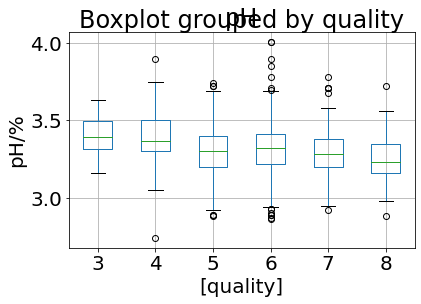

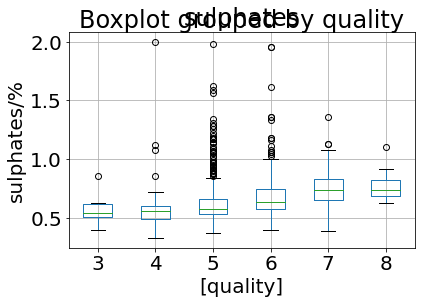

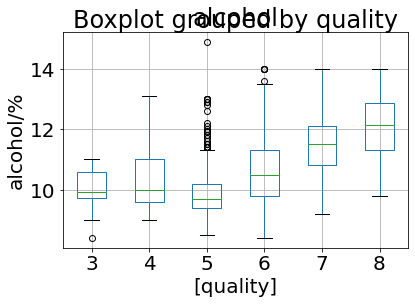

In [185]:
import matplotlib
from matplotlib import pylab as plt

col = df.loc[:, df.columns != 'quality'].columns

for i in col[0:]:
    df[[i,'quality']].boxplot(by='quality')
    plt.ylabel(i +'/%')
    plt.savefig('../figures/boxplot_' + i + ' VS quality.jpg', dpi = 300,bbox_inches='tight')
    plt.show()


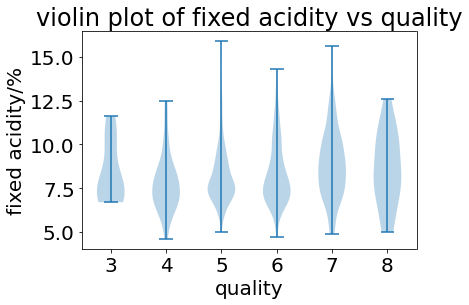

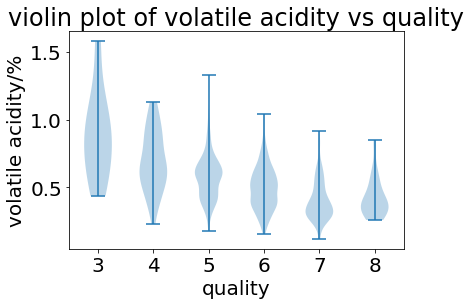

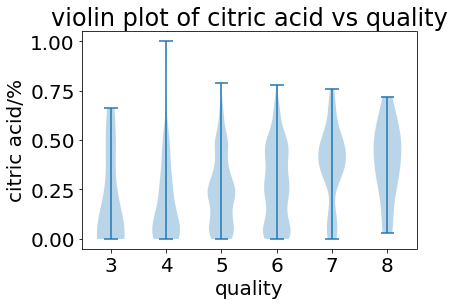

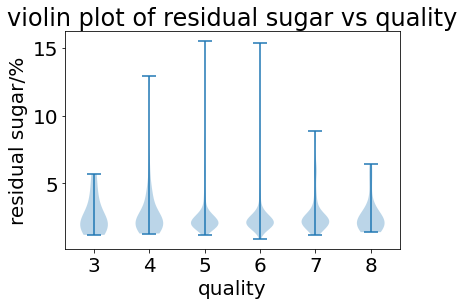

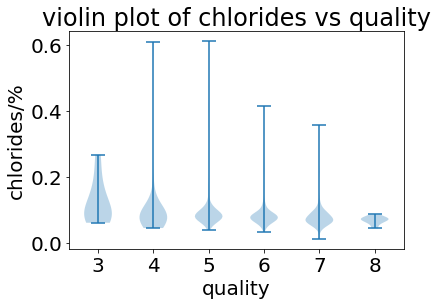

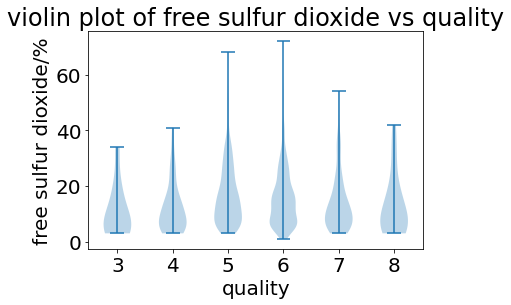

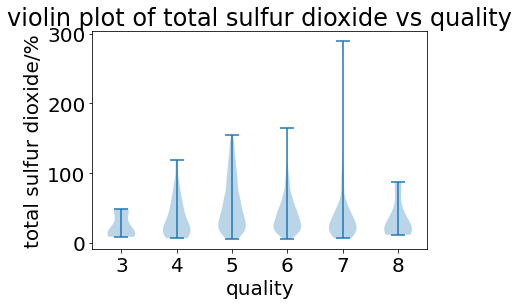

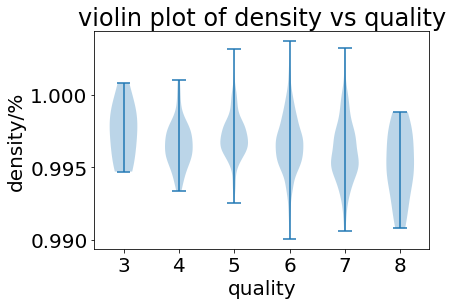

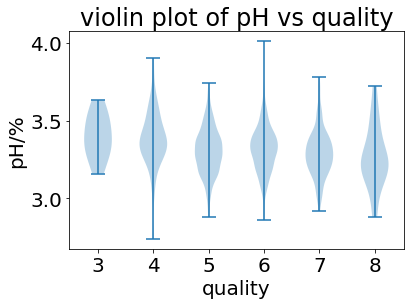

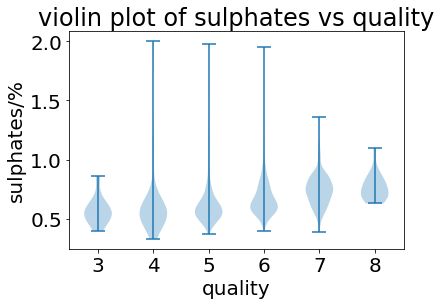

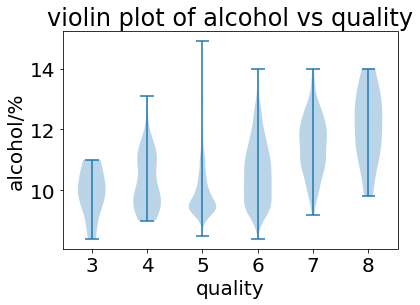

In [184]:
for i in col[0:]:  
    dataset = [df[df['quality'] == 3][i].values,
           df[df['quality'] == 4][i].values,
           df[df['quality'] == 5][i].values,
           df[df['quality'] == 6][i].values,
           df[df['quality'] == 7][i].values,
           df[df['quality'] == 8][i].values]
        
    plt.violinplot(dataset = dataset)
    plt.xticks([1,2,3,4,5,6],['3','4','5','6','7','8'])
    plt.xlabel('quality')
    plt.ylabel(i + '/%')
    plt.title('violin plot of ' + i + ' vs quality')
    plt.savefig('../figures/violinplot_' + i + ' VS quality.jpg', dpi = 300, bbox_inches='tight')
    plt.show()

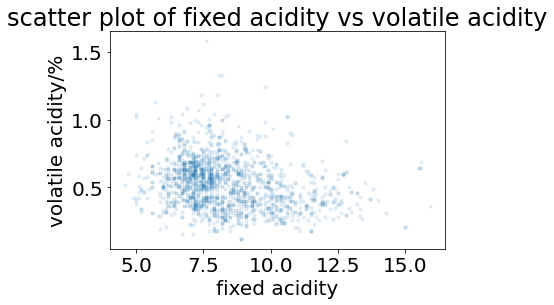

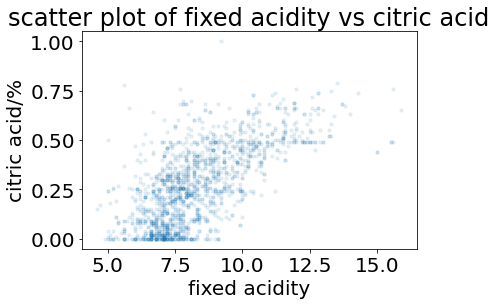

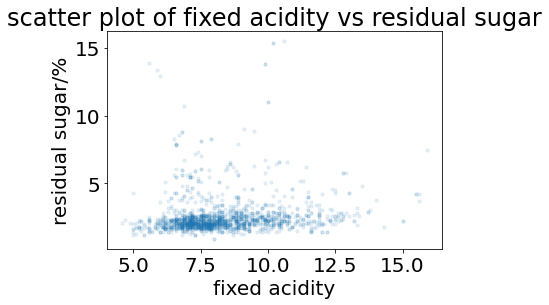

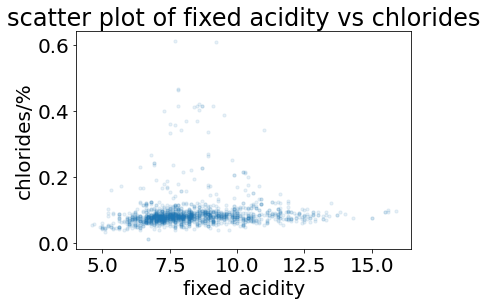

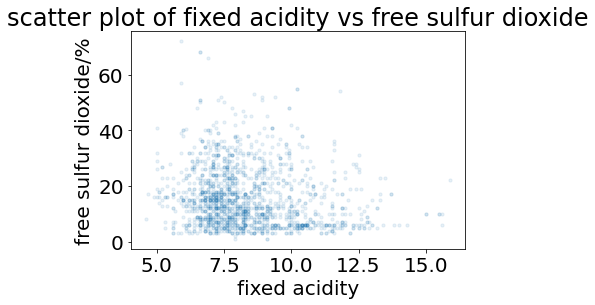

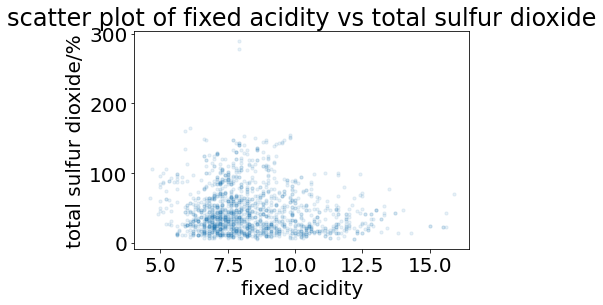

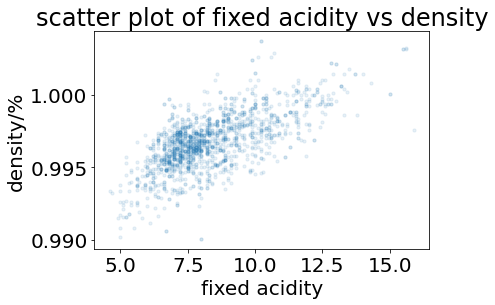

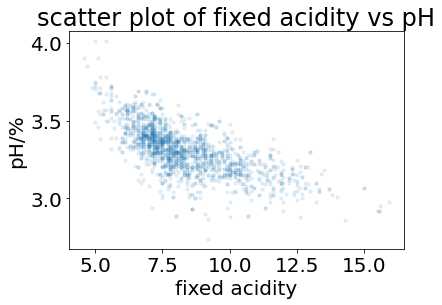

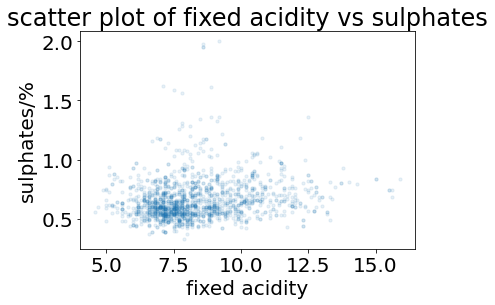

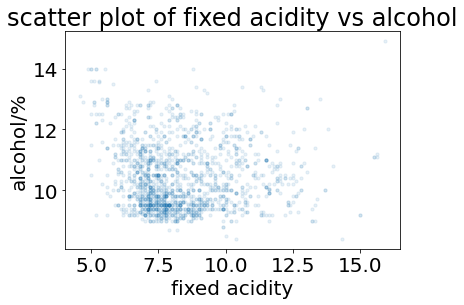

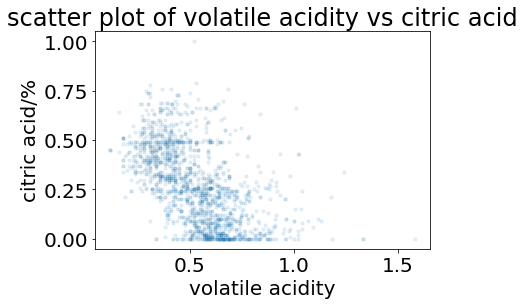

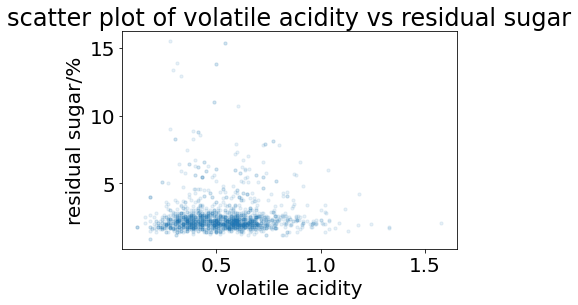

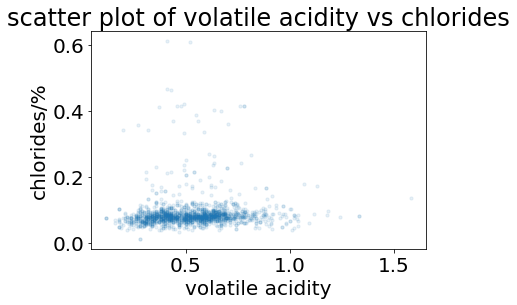

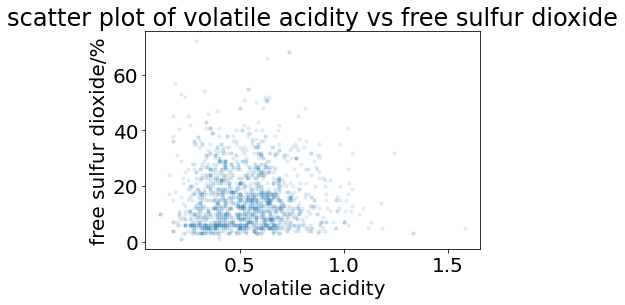

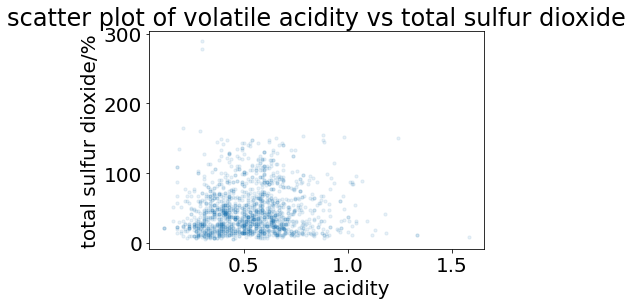

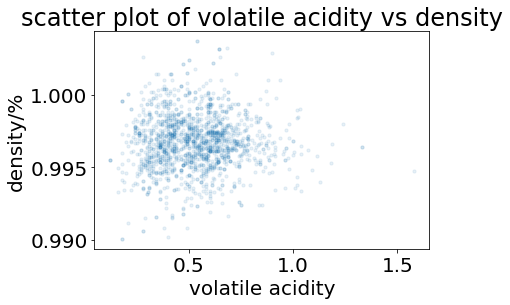

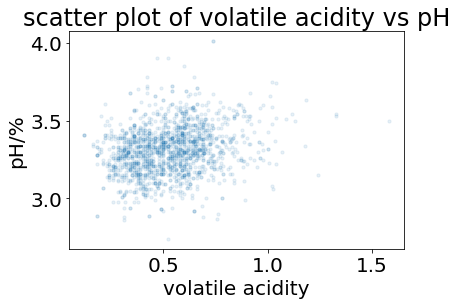

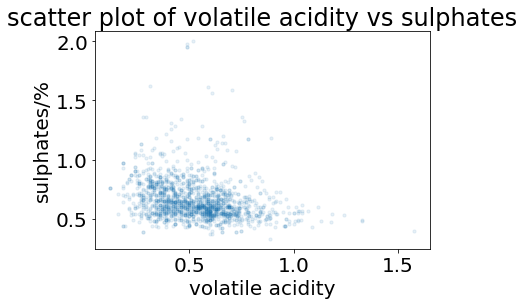

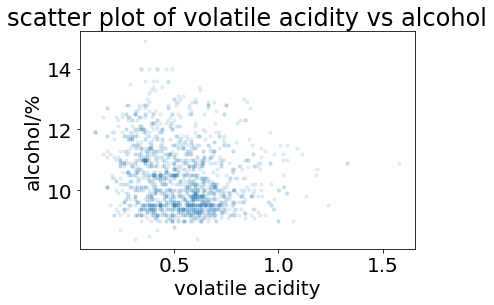

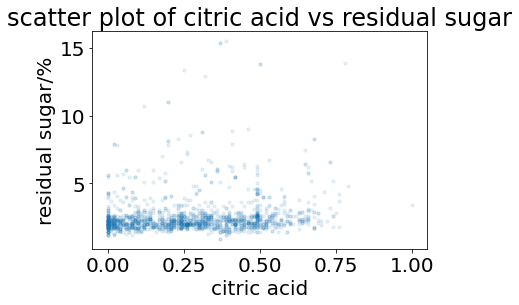

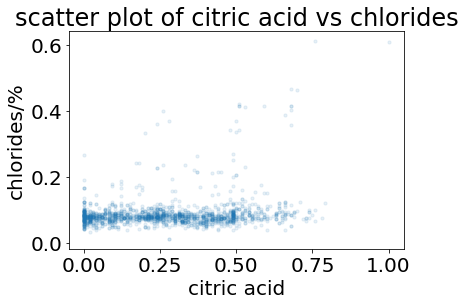

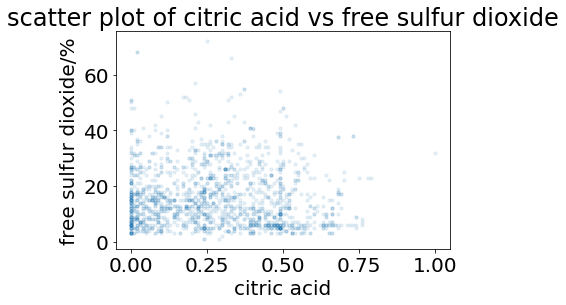

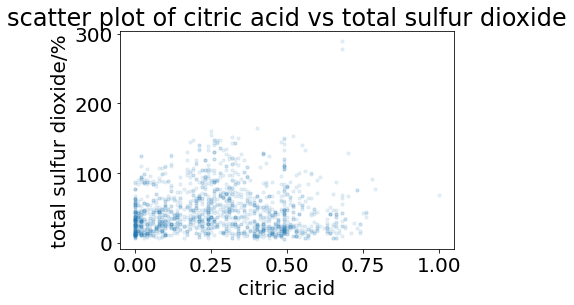

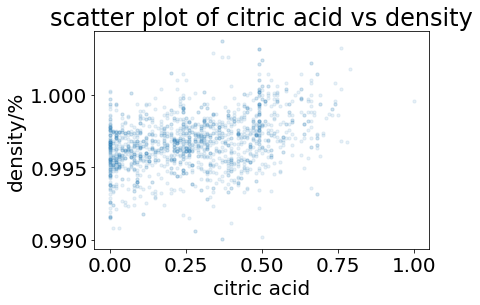

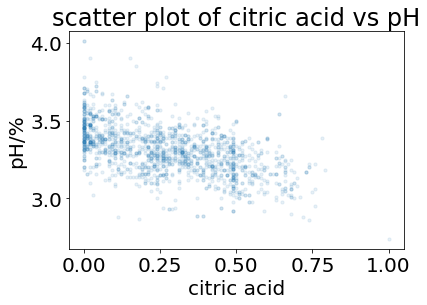

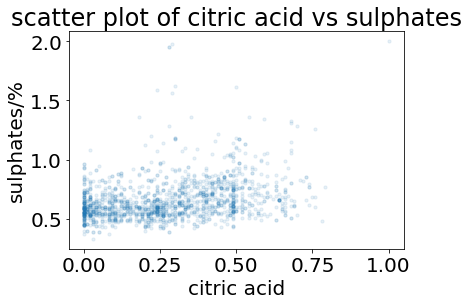

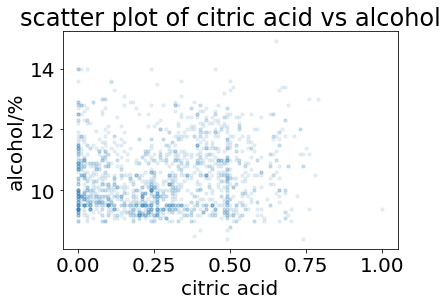

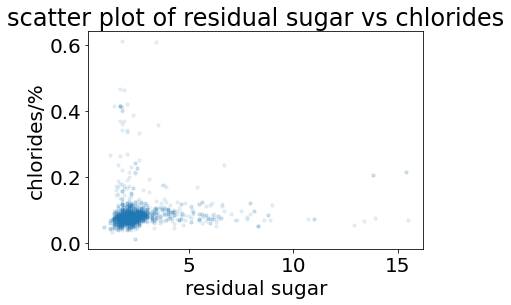

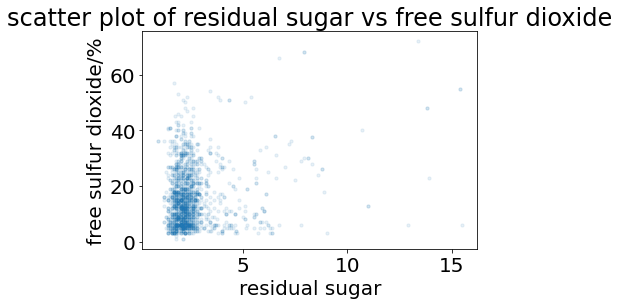

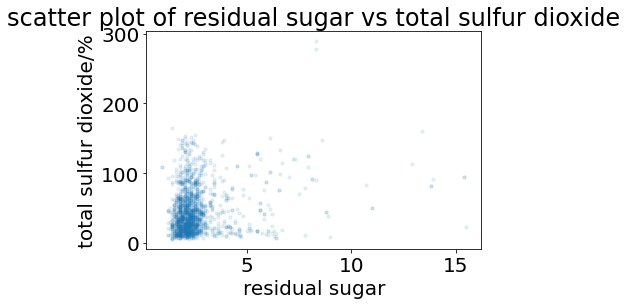

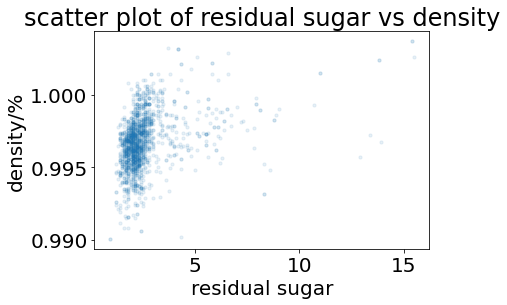

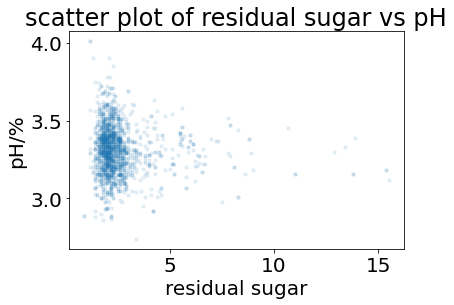

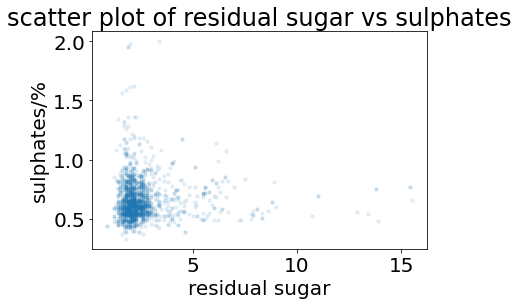

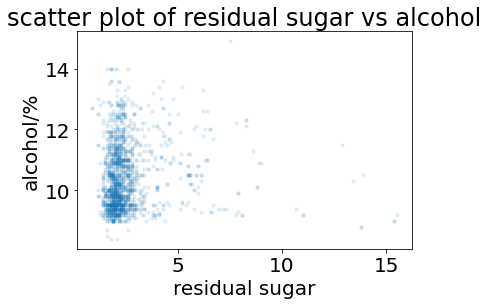

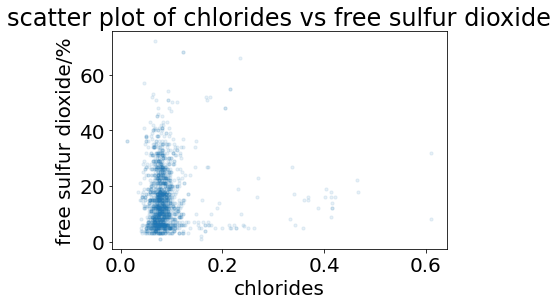

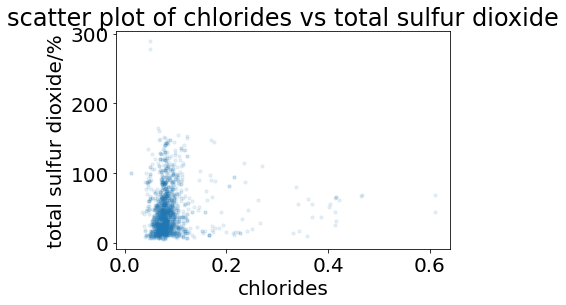

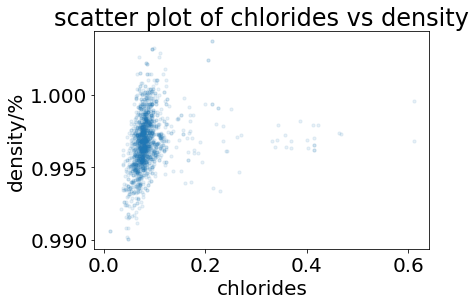

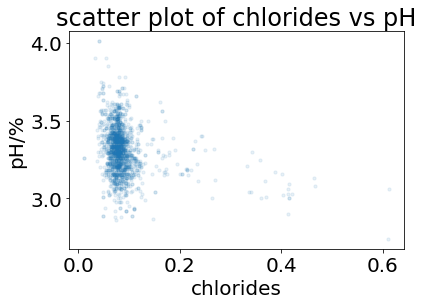

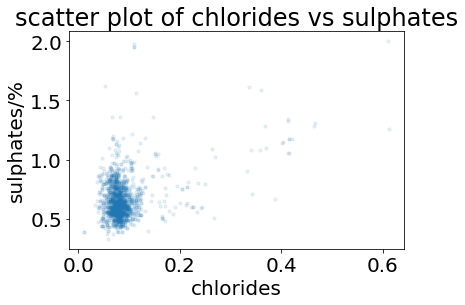

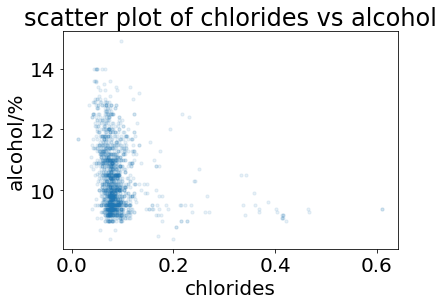

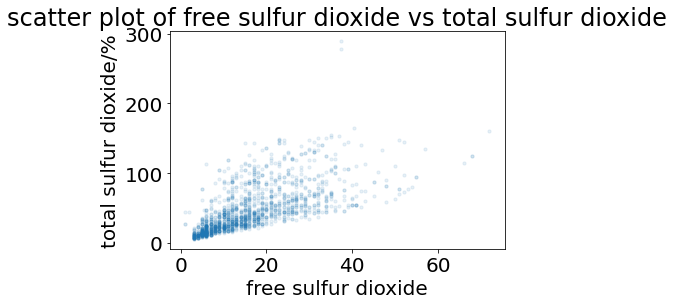

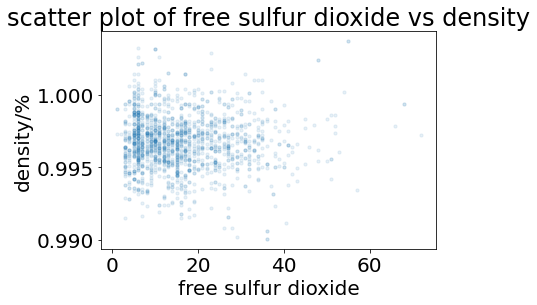

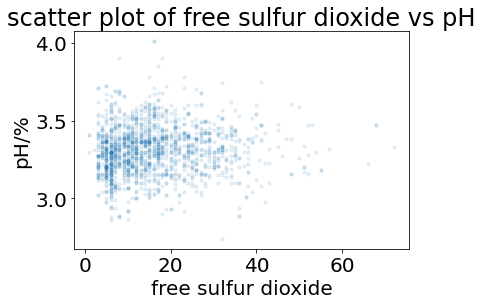

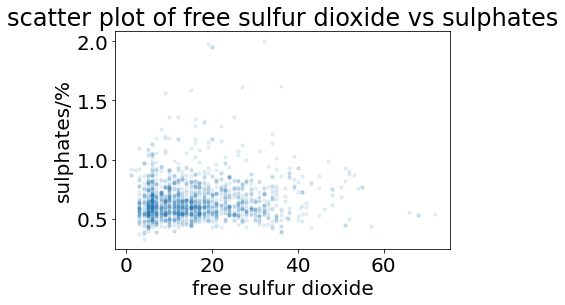

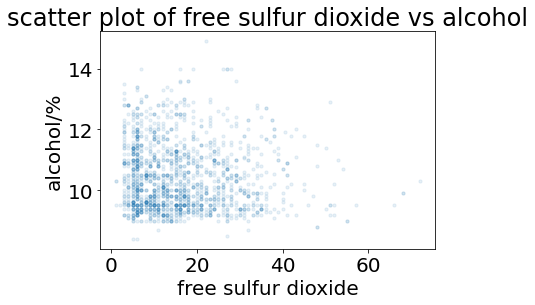

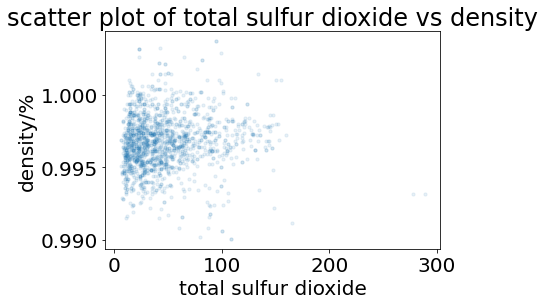

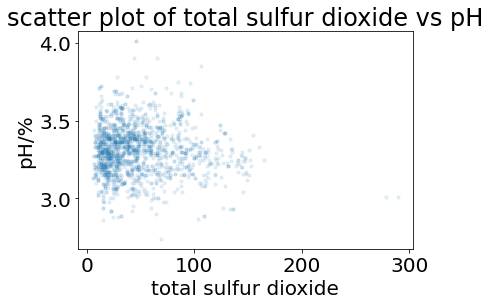

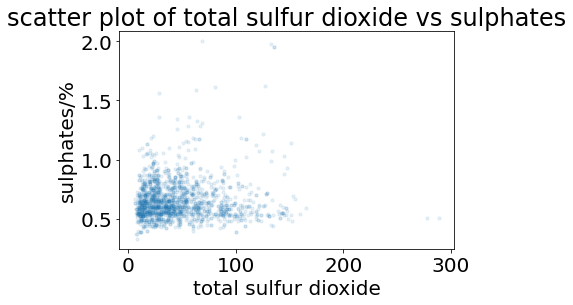

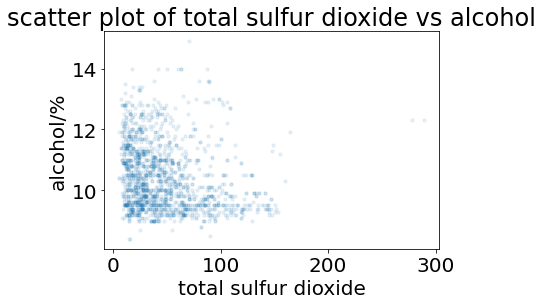

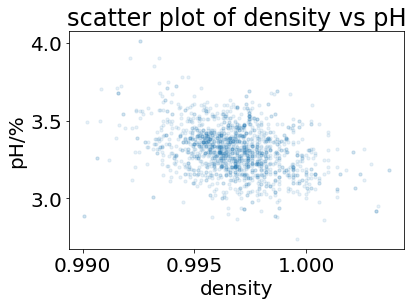

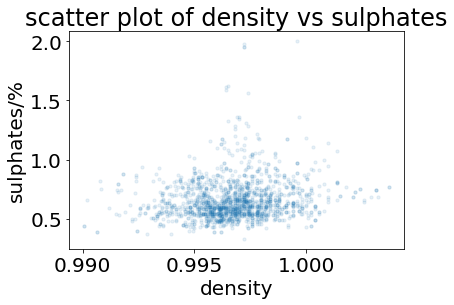

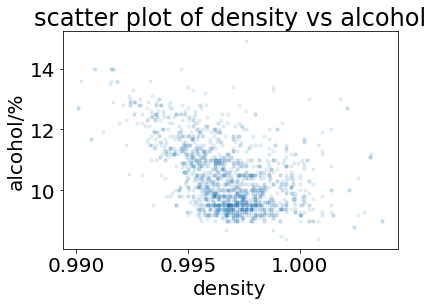

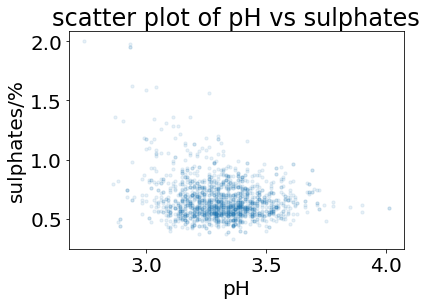

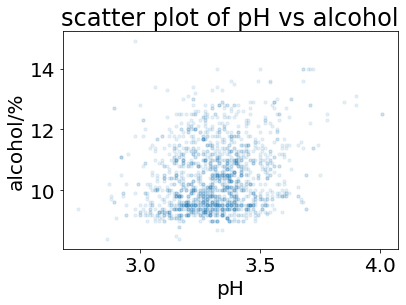

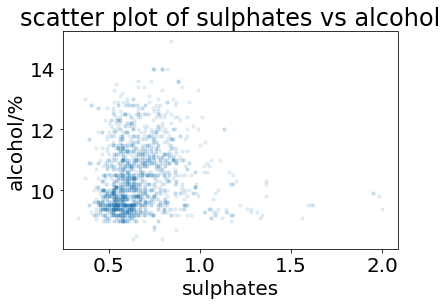

In [183]:
for i in range(len(col)):
    for j in range(i+1,len(col)):
            df.plot.scatter(col[i],col[j],alpha=0.1,s=10) # alpha=0.1,s=10
            plt.title('scatter plot of ' + col[i] + ' vs ' +col[j])
            plt.ylabel( col[j] +'/%')
            plt.savefig('../figures/scatter plot of ' + col[i] + ' vs ' + col[j] + '.jpg', dpi = 300,bbox_inches='tight')
            plt.show()

In [74]:
df = pd.read_csv('../data/winequality-red.csv')
X = df.loc[:, df.columns != 'quality']
#create classify function to split quality into three level, poor, median, and high
df['definedquality']=[1 if x>=6 else 0 for x in df['quality']]
y = df['definedquality']



In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import statistics 

nr_states = 10
test_scores = np.zeros(nr_states)

for i in range(nr_states):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
    scaler = StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    LogReg = LogisticRegression(solver = 'saga') 
    LogReg.fit(X_train,y_train)
    y_test_pred = LogReg.predict(X_test)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('accuracy score is', accuracy_score(y_test,y_test_pred))
baseline_score = test_scores

accuracy score is 0.75
accuracy score is 0.740625
accuracy score is 0.7625
accuracy score is 0.778125
accuracy score is 0.74375
accuracy score is 0.746875
accuracy score is 0.8
accuracy score is 0.734375
accuracy score is 0.721875
accuracy score is 0.7375


In [266]:
def ML_Pipeline(X, y, preprocessor, clf, param_grid, key1=True, key2=False):
    test_scores = np.zeros(10)
    final_models = []
    for i in range(10):
        
        random_state = 42 * i

        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

        kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
        
        if key1:
            clf.set_params(random_state=random_state)
        if key2:
            clf.set_params(seed=random_state)
        
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', clf)])

        grid = GridSearchCV(pipe, param_grid=param_grid, 
                                scoring='accuracy',
                                cv=kf, return_train_score=True, n_jobs=-1)

        grid.fit(X_other, y_other)

        results = pd.DataFrame(grid.cv_results_)
        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        # save the model
        final_models.append(grid)
        # calculate and save the test score
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = accuracy_score(y_test,y_test_pred)
        print('test score:',test_scores[i])
    return test_scores, final_models

In [106]:
std_ftrs = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

preprocessor = ColumnTransformer(transformers=[('std', StandardScaler(), std_ftrs)])

In [271]:
param_grid_L1L = {'classifier__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                  'classifier__max_iter': [100000]}
param_grid_L2L = {'classifier__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                  'classifier__max_iter': [100000]}
param_grid_ENL = {'classifier__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                  'classifier__l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
                  'classifier__max_iter': [100000]}
param_grid_SVC = {'classifier__gamma': [1e-2, 1e-1, 1e0, 1e1, 1e2],
                  'classifier__C': np.logspace(-1, 1, 5)}
param_grid_KNN = {'classifier__n_neighbors': [1, 2, 3, 5, 10, 30, 100, 200],
                  'classifier__weights': ['uniform', 'distance']}

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

l1l = LogisticRegression(penalty='l1', solver='saga')
l2l = LogisticRegression(penalty='l2', solver='saga') 
enl = LogisticRegression(penalty='elasticnet', solver='saga')
svc = SVC() 
knn = KNeighborsClassifier()


In [109]:
l1_score, l1_model = ML_Pipeline(X,y,preprocessor, l1l, param_grid_L1L, key1=True, key2=False)

best model parameters: {'classifier__C': 1.0, 'classifier__max_iter': 100000}
validation score: 0.7427879901960784
test score: 0.75
best model parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7458700980392157
test score: 0.734375
best model parameters: {'classifier__C': 1.0, 'classifier__max_iter': 100000}
validation score: 0.7412254901960784
test score: 0.76875
best model parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7349662990196079
test score: 0.76875
best model parameters: {'classifier__C': 1.0, 'classifier__max_iter': 100000}
validation score: 0.7435692401960784
test score: 0.74375
best model parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7419485294117647
test score: 0.734375
best model parameters: {'classifier__C': 10.0, 'classifier__max_iter': 100000}
validation score: 0.7294975490196078
test score: 0.8
best model parameters: {'classifier__C': 0.1, 'classifier__

In [110]:
l2_score, l2_model = ML_Pipeline(X,y,preprocessor, l2l, param_grid_L2L, key1=True, key2=False)

best model parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7396507352941176
test score: 0.753125
best model parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7450949754901961
test score: 0.740625
best model parameters: {'classifier__C': 10.0, 'classifier__max_iter': 100000}
validation score: 0.7404442401960785
test score: 0.7625
best model parameters: {'classifier__C': 0.01, 'classifier__max_iter': 100000}
validation score: 0.7365287990196079
test score: 0.765625
best model parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7459160539215686
test score: 0.74375
best model parameters: {'classifier__C': 0.01, 'classifier__max_iter': 100000}
validation score: 0.7450827205882353
test score: 0.74375
best model parameters: {'classifier__C': 10.0, 'classifier__max_iter': 100000}
validation score: 0.7294975490196078
test score: 0.8
best model parameters: {'classifier__C': 0.01, 'class

In [111]:
En_score, En_model = ML_Pipeline(X,y,preprocessor, enl, param_grid_ENL, key1=True, key2=False)

best model parameters: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7443443627450981
test score: 0.753125
best model parameters: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7474387254901961
test score: 0.740625
best model parameters: {'classifier__C': 0.01, 'classifier__l1_ratio': 0.25, 'classifier__max_iter': 100000}
validation score: 0.7443474264705883
test score: 0.75625
best model parameters: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.75, 'classifier__max_iter': 100000}
validation score: 0.7380912990196078
test score: 0.775
best model parameters: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.1, 'classifier__max_iter': 100000}
validation score: 0.7467003676470588
test score: 0.74375
best model parameters: {'classifier__C': 0.01, 'classifier__l1_ratio': 0.01, 'classifier__max_iter': 100000}
validation score: 0.7466421568627452
test score: 0.74375
best model 

In [299]:
test_scores = np.zeros(10)
final_models = []

param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.1, 0.2, 0.3, 0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 

for i in range(10):

    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

    kf = KFold(n_splits=4,shuffle=True,random_state=42*i)

    clf = RandomForestClassifier(random_state = 42*i) # initialize the classifier

    pipe = make_pipeline(preprocessor,clf)

    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

    grid.fit(X_other, y_other)
 
    results = pd.DataFrame(grid.cv_results_)

    print('best model parameters:',grid.best_params_)
    print('validation score:',grid.best_score_) # this is the mean validation score over all iterations

    final_models.append(grid)

    y_test_pred = final_models[-1].predict(X_test)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])
Rf_score, Rf_modle = test_scores, final_models

Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.1}
validation score: 0.7951826998432602
test score: 0.8125
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 0.75}
validation score: 0.8068745101880878
test score: 0.79375
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.2}
validation score: 0.8076802507836991
test score: 0.8
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 0.3}
validation score: 0.8092133620689654
test score: 0.834375
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'

In [113]:
SVC_score, SVC_model = ML_Pipeline(X, y, preprocessor, svc, param_grid_SVC, key1=True, key2=False)

best model parameters: {'classifier__C': 0.31622776601683794, 'classifier__gamma': 0.1}
validation score: 0.7615563725490195
test score: 0.7625
best model parameters: {'classifier__C': 10.0, 'classifier__gamma': 0.1}
validation score: 0.7607322303921569
test score: 0.746875
best model parameters: {'classifier__C': 1.0, 'classifier__gamma': 0.1}
validation score: 0.7599938725490196
test score: 0.775
best model parameters: {'classifier__C': 10.0, 'classifier__gamma': 0.1}
validation score: 0.7693688725490195
test score: 0.78125
best model parameters: {'classifier__C': 3.1622776601683795, 'classifier__gamma': 0.1}
validation score: 0.7693566176470588
test score: 0.79375
best model parameters: {'classifier__C': 3.1622776601683795, 'classifier__gamma': 0.1}
validation score: 0.7630606617647059
test score: 0.784375
best model parameters: {'classifier__C': 3.1622776601683795, 'classifier__gamma': 0.1}
validation score: 0.7497947303921568
test score: 0.8
best model parameters: {'classifier__C'

In [267]:
knn_score, knn_model = ML_Pipeline(X,y,preprocessor, knn, param_grid_KNN, key1=False, key2=False)

best model parameters: {'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
validation score: 0.7873376225490196
test score: 0.796875
best model parameters: {'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
validation score: 0.7841697303921569
test score: 0.809375
best model parameters: {'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
validation score: 0.7990900735294117
test score: 0.8
best model parameters: {'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
validation score: 0.7889062499999999
test score: 0.8125
best model parameters: {'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
validation score: 0.7834160539215687
test score: 0.821875
best model parameters: {'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
validation score: 0.7935416666666667
test score: 0.796875
best model parameters: {'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
validation score: 0.77

In [187]:
import statistics 

print("mean of baseline:", statistics.mean(baseline_score),"; std of baseline:", statistics.stdev(baseline_score))
print("mean of l1:", statistics.mean(l1_score),"; std of l1:", statistics.stdev(l1_score))
print("mean of l2:", statistics.mean(l2_score),"; std of l2:", statistics.stdev(l2_score))
print("mean of ElasticNet:", statistics.mean(En_score),"; std of ElasticNet:", statistics.stdev(En_score))
print("mean of RF:", statistics.mean(Rf_score),"; std of RF:", statistics.stdev(Rf_score))
print("mean of SVC:", statistics.mean(SVC_score),"; std of SVC:", statistics.stdev(SVC_score))
print("mean of KNN:", statistics.mean(knn_score),"; std of KNN:", statistics.stdev(knn_score))

mean of baseline: 0.7515625 ; std of baseline: 0.022975776041784135
mean of l1: 0.7490625 ; std of l1: 0.023618513953864446
mean of l2: 0.7484375 ; std of l2: 0.023719369868199378
mean of ElasticNet: 0.7475 ; std of ElasticNet: 0.02584509141016918
mean of RF: 0.80875 ; std of RF: 0.0161911326897712
mean of SVC: 0.768125 ; std of SVC: 0.024107326571904338
mean of KNN: 0.8059375 ; std of KNN: 0.015341172135791973


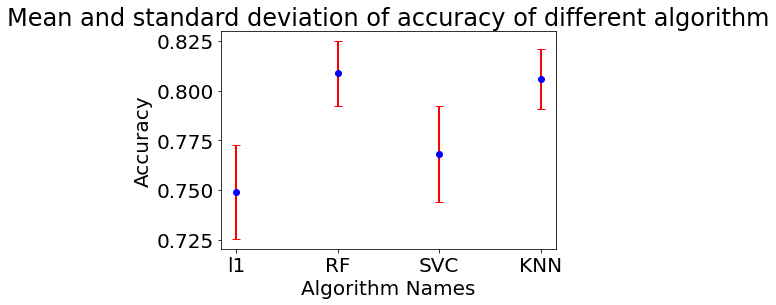

In [189]:
import matplotlib.pyplot as plt
coefficients = [statistics.mean(l1_score),statistics.mean(Rf_score),statistics.mean(SVC_score),statistics.mean(knn_score)]
standdev = [statistics.stdev(l1_score),statistics.stdev(Rf_score),statistics.stdev(SVC_score),statistics.stdev(knn_score)]
features = ["l1","RF","SVC","KNN"]
plt.errorbar(np.arange(4), coefficients, yerr = standdev, fmt='o', ecolor='r', color='b', elinewidth=2, capsize=4)
plt.xticks(np.arange(4), features)
plt.ylabel('Accuracy')
plt.xlabel('Algorithm Names')
plt.title('Mean and standard deviation of accuracy of different algorithm')
plt.savefig('../figures/algorithm accuracy comparison.jpg', dpi = 300,bbox_inches='tight')
plt.show()

In [300]:
import pickle
file = open('../results/log_models_tuned.save', 'wb')
pickle.dump(l1_model, file)
file.close()

file = open('../results/l1_models_tuned.save', 'wb')
pickle.dump(l2_model, file)
file.close()

file = open('../results/l2_models_tuned.save', 'wb')
pickle.dump(En_model, file)
file.close()

file = open('../results/en_models_tuned.save', 'wb')
pickle.dump(Rf_modle, file)
file.close()

file = open('../results/rf_models_tuned.save', 'wb')
pickle.dump(SVC_model, file)
file.close()

file = open('../results/sv_models_tuned.save', 'wb')
pickle.dump(knn_models, file)
file.close()

In [231]:
#run 100 times
test_scores = np.zeros(100)
final_models = []
y_train_collect = []
baseline = []

param_grid = {
              'randomforestclassifier__max_depth': [30], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.2] # linearly spaced between 0.5 and 1
              } 

for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
    
    y_train_collect.append(y_train)

    clf = RandomForestClassifier(random_state=42*i) # initialize the classifier

    pipe = make_pipeline(preprocessor,clf)

    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

    grid.fit(X_train, y_train)
    
    baseline.append(np.sum(y_test == 0)/len(y_test))
 
    results = pd.DataFrame(grid.cv_results_)

    final_models.append(grid)

    y_test_pred = final_models[-1].predict(X_test)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])

Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.821875
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.79375
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.809375
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.821875
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.83125
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.821875
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.8625
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.81875
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.796875
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.83125
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.8375
Fitting 4 folds for each of 1 candidates, totalling 4 fits
test score: 0.8125
Fitting 4 folds for each of 1 candidates, totallin

In [232]:
print("mean of baseline:", statistics.mean(baseline),"; std of baseline:", statistics.stdev(baseline))
print("mean of best RF:", statistics.mean(test_scores),"; std of l1:", statistics.stdev(test_scores))

mean of baseline: 0.46421875 ; std of baseline: 0.025786151776132037
mean of best RF: 0.81340625 ; std of l1: 0.021084167061907955


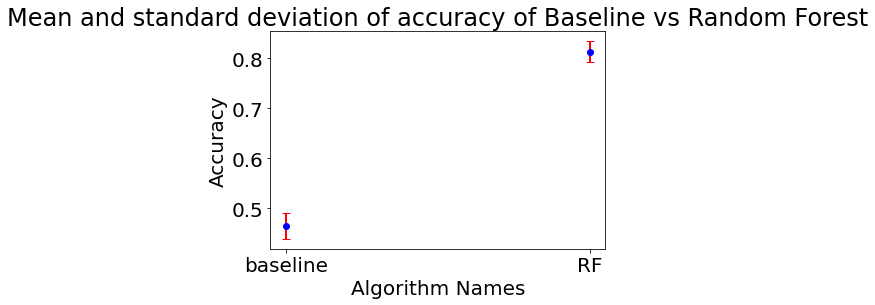

In [233]:
import matplotlib.pyplot as plt
coefficients = [statistics.mean(baseline),statistics.mean(test_scores)]
standdev = [statistics.stdev(baseline),statistics.stdev(test_scores)]
features = ["baseline","RF"]
plt.errorbar(np.arange(2), coefficients, yerr = standdev, fmt='o', ecolor='r', color='b', elinewidth=2, capsize=4)
plt.xticks(np.arange(2), features)
plt.ylabel('Accuracy')
plt.xlabel('Algorithm Names')
plt.title('Mean and standard deviation of accuracy of Baseline vs Random Forest')
plt.savefig('../figures/Baseline Vs RF.jpg', dpi = 300,bbox_inches='tight')
plt.show()

In [116]:
ftr_names = X.columns

In [234]:
np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])
grid = final_models[-1]
test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.81875
test baseline =  0.5
shuffling fixed acidity
   shuffled test score: 0.807 +/- 0.007
shuffling volatile acidity
   shuffled test score: 0.807 +/- 0.009
shuffling citric acid
   shuffled test score: 0.812 +/- 0.007
shuffling residual sugar
   shuffled test score: 0.817 +/- 0.006
shuffling chlorides
   shuffled test score: 0.815 +/- 0.007
shuffling free sulfur dioxide
   shuffled test score: 0.83 +/- 0.005
shuffling total sulfur dioxide
   shuffled test score: 0.802 +/- 0.009
shuffling density
   shuffled test score: 0.815 +/- 0.009
shuffling pH
   shuffled test score: 0.81 +/- 0.004
shuffling sulphates
   shuffled test score: 0.76 +/- 0.011
shuffling alcohol
   shuffled test score: 0.713 +/- 0.025


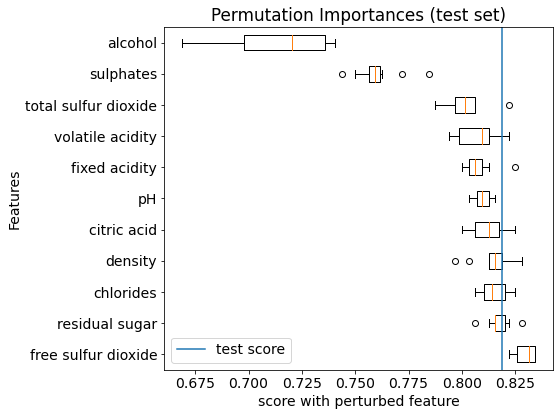

In [255]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.ylabel('Features')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/permutation.jpg', dpi = 300)
plt.show()

In [127]:
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.7998432601880878
0.809375
{'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 0.5}


(320, 11)
(2, 320, 11)


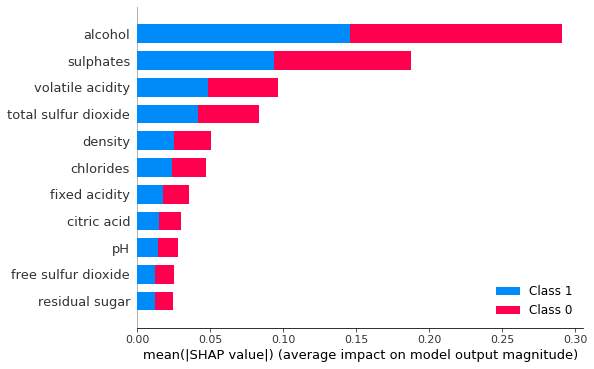

In [213]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))
shap.summary_plot(shap_values, X_test, feature_names = X.columns, 
                  title="SHAP Summary Plot for Random State 1", show=False)

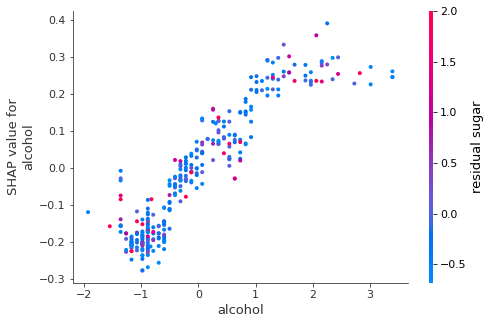

In [205]:
shap.dependence_plot(ftr, shap_values[1], X_test_transformed[:1000], feature_names=ftr_names)

In [196]:
index = 1 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = ftr_names, show = False)
plt.savefig('../figures/local.jpg', dpi = 300,bbox_inches='tight')


0.4636278342455041


<Figure size 432x288 with 0 Axes>

In [241]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(max_depth = 30,max_features = 0.2, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=0.2, random_state=0)

In [242]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.026 seconds


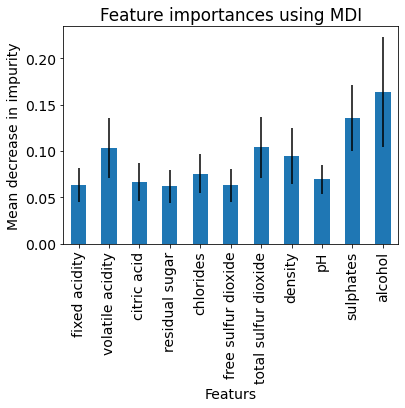

In [253]:
import pandas as pd

forest_importances = pd.Series(importances, index=ftr_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Featurs")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig('../figures/global1.jpg', dpi = 300, bbox_inches='tight')

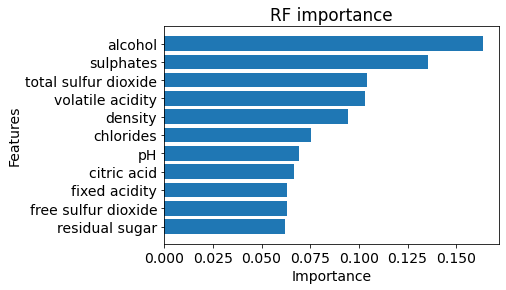

In [254]:
forest.feature_importances_

sorted_idx = forest.feature_importances_.argsort()

feature_names = [ftr_names[i] for i in sorted_idx]

plt.barh(feature_names, forest.feature_importances_[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("RF importance")
plt.savefig('../figures/global2.jpg', dpi = 300, bbox_inches='tight')

In [295]:
from sklearn.linear_model import LogisticRegression
def ML_pipeline_kfold_LR1(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    final_scaler = StandardScaler()
    pipe = make_pipeline(preprocessor,final_scaler,LogisticRegression(penalty='l2',solver='lbfgs'))
    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10,100]}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid, scoring = 'accuracy', cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, X_test, y_test

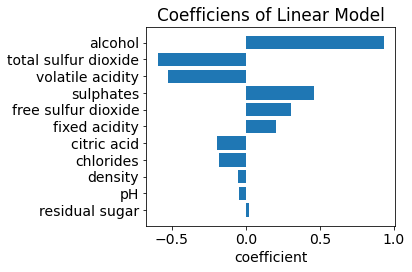

In [296]:
grid, X_test, y_test = ML_pipeline_kfold_LR1(X,y,42,4)
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(11),coefs[sorted_indcs[-11:]])
plt.yticks(np.arange(11),ftr_names[sorted_indcs[-11:]])
plt.xlabel('coefficient')
plt.title('Coefficiens of Linear Model')
plt.tight_layout()
plt.savefig('../figures/global3.jpg', dpi = 300, bbox_inches='tight')
plt.show()